In [7]:
import numpy as np
import dynesty
from functools import partial

In [67]:
def make_gaussian_likelihood_components(model, log_prior):
    """Create the log_likelihood, log_posterior, predict functions from a
    model and log_prior"""
    def log_likelihood(theta,y, x, sigma_y):
        #theta = tuple(theta)
        prediction = model(theta, x)

        return (
            -0.5 * np.sum((y - prediction)**2/sigma_y**2)    # Exponent
            -0.5 * np.sum(np.log(2*np.pi*sigma_y**2))        # Normalisation
        )
    
    def log_posterior(theta, x, sigma_y, y):
        return log_likelihood(theta, y, x, sigma_y) + log_prior(theta)
    
    def predict(theta, x, sigma_y):
        mu = model(theta, x)
        return np.random.normal(loc=mu, scale=sigma_y)
    
    return log_likelihood, log_posterior, predict

In [68]:
x, y, y_err = np.loadtxt("data/linear_fits/data_2.txt", unpack=True)

In [69]:
def linear_model(theta, x):
    m, b = theta
    return m*x + b

def log_prior_linear_model(theta):
    m, b = theta
    # Unnormalised uniform prior m\simU(-2, 2), b \sim U(-3, 3)
    if -2 < m < 2 and -3 < b < 3:
        return 0
    else:
        return -np.inf
    
log_likelihood_lin, log_posterior_lin, predict_lin = \
    make_gaussian_likelihood_components(
        linear_model, log_prior_linear_model
    )

In [70]:
def quadratic_model(theta, x):
    a, b, c = theta
    return a*x**2 + b*x + c

def log_prior_quadratic_model(theta):
    a, b, c = theta
    # Unnormalised uniform prior m\simU(-2, 2), b \sim U(-3, 3)
    if -1 < a < 1 and -2 < b < 2 and -3 < c < 3:
        return 0
    else:
        return -np.inf
    
log_likelihood_quad, log_posterior_quad, predict_quad = \
    make_gaussian_likelihood_components(
        quadratic_model, log_prior_quadratic_model
    )

In [71]:
def cubic_model(theta, x):
    a, b, c, d = theta
    return a*x**3 + b*x**2 + c*x + d

def log_prior_cubic_model(theta):
    a, b, c, d = theta
    # Unnormalised uniform prior m\simU(-2, 2), b \sim U(-3, 3)
    if -1 < a < 1 and -1 < b < 1 and -2 < c < 2 and -3 < d < 3:
        return 0
    else:
        return -np.inf
    
log_likelihood_cub, log_posterior_cub, predict_cub = \
    make_gaussian_likelihood_components(
        cubic_model, log_prior_cubic_model
    )

In [72]:
def ptform_lin(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return np.array([2. * (2. * u[0] - 1.),3. * (2. * u[1] - 1.)])


sampler_lin = dynesty.NestedSampler(
    loglikelihood=log_likelihood_lin, 
    logl_args=[y,x,y_err],
    prior_transform=ptform_lin,
    ndim=2,
    nlive=1000,
)
sampler_lin.run_nested(print_progress=False)

# Show summary of the run
sampler_lin.results.summary()

Summary
nlive: 1000
niter: 10190
ncall: 46911
eff(%): 23.854
logz: 22.112 +/-  0.229


In [60]:
def ptform_quad(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return np.array([1. * (2. * u[0] - 1.),2. * (2. * u[1] - 1.),3. * (2. * u[2] - 1.)])


sampler_quad = dynesty.NestedSampler(
    loglikelihood=log_likelihood_quad, 
    logl_args=[y,x,y_err],
    prior_transform=ptform_quad,
    ndim=3,
    nlive=5000,
)
sampler_quad.run_nested(print_progress=False)

# Show summary of the run
sampler_quad.results.summary()

Summary
nlive: 5000
niter: 56682
ncall: 247666
eff(%): 24.905
logz: 24.624 +/-  0.301


In [61]:
def ptform_cub(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return np.array([1. * (2. * u[0] - 1.),1. * (2. * u[1] - 1.),2. * (2. * u[2] - 1.),3. * (2. * u[3] - 1.)])


sampler_cub = dynesty.NestedSampler(
    loglikelihood=log_likelihood_cub, 
    logl_args=[y,x,y_err],
    prior_transform=ptform_cub,
    ndim=4,
    nlive=1000,
)
sampler_cub.run_nested(print_progress=False)

# Show summary of the run
sampler_cub.results.summary()

Summary
nlive: 1000
niter: 15754
ncall: 61862
eff(%): 27.083
logz: 23.743 +/-  0.293


" fg, ax = dyplot.cornerplot(res2, color='dodgerblue', truths=[0., 0., 0.], truth_color='black',\n                           show_titles=True, title_kwargs={'y': 1.05},\n                           quantiles=None, max_n_ticks=3, fig=(fig, axes[:, 4:])) "

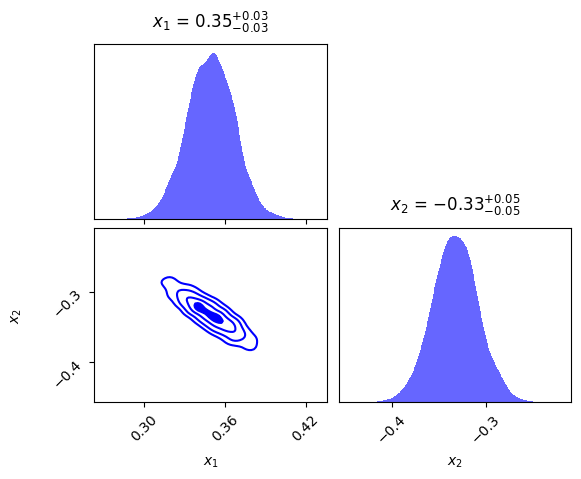

In [62]:
res1 = sampler_lin.results
res2 = sampler_quad.results
res3 = sampler_cub.results

from dynesty import plotting as dyplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
axes = axes.reshape((2,2))


# plot initial run (left)
fg, ax = dyplot.cornerplot(res1, color='blue', truths=[0., 0., 0.], truth_color='black',
                           show_titles=True, max_n_ticks=3, title_kwargs={'y': 1.05},
                           quantiles=None, fig=(fig, axes))

# plot extended run (right)
""" fg, ax = dyplot.cornerplot(res2, color='dodgerblue', truths=[0., 0., 0.], truth_color='black',
                           show_titles=True, title_kwargs={'y': 1.05},
                           quantiles=None, max_n_ticks=3, fig=(fig, axes[:, 4:])) """

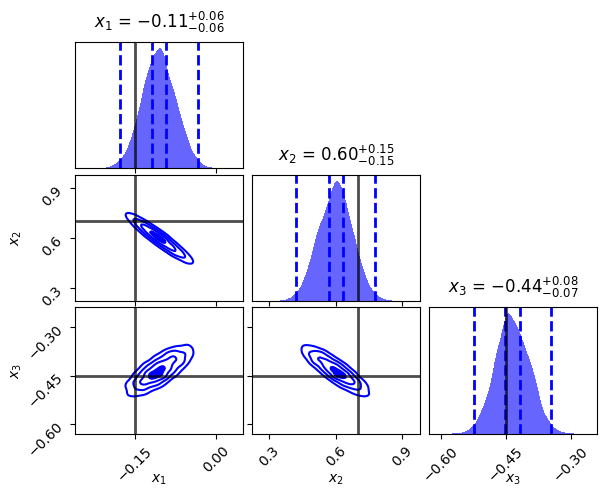

In [63]:
fig, axes = plt.subplots(3,3)
axes = axes.reshape((3,3))


# plot initial run (left)
fg, ax = dyplot.cornerplot(res2, color='blue', truths=[-0.15, 0.7, -0.45], truth_color='black',
                           show_titles=True, max_n_ticks=3, title_kwargs={'y': 1.05},
                           quantiles=[0.01,0.33,0.67,0.99], fig=(fig, axes))


a_true, b_true, c_true,  = -0.15, 0.7, -0.45

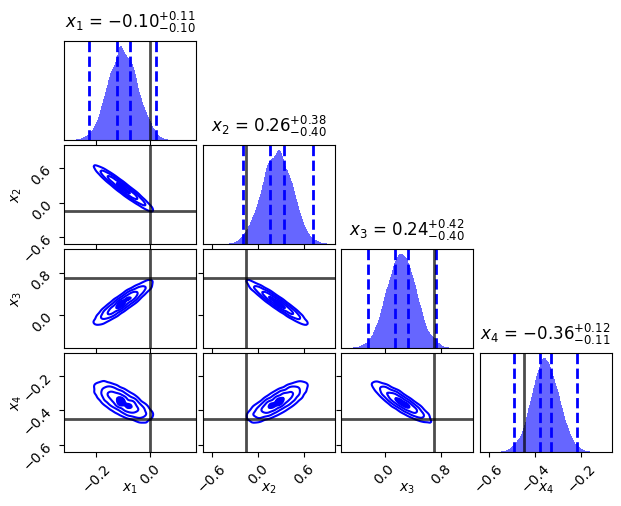

In [64]:
fig, axes = plt.subplots(4,4)
axes = axes.reshape((4,4))


# plot initial run (left)
fg, ax = dyplot.cornerplot(res3, color='blue', truths=[0.,-0.15, 0.7, -0.45], truth_color='black',
                           show_titles=True, max_n_ticks=3, title_kwargs={'y': 1.05},
                           quantiles=[0.01,0.33,0.67,0.99], fig=(fig, axes))

In [76]:
from bayesian_stats_course_tools.analyse import plot_data, analyse_data

results_linear = analyse_data(
    data=dict(x=x, y=y, y_err=y_err),
    log_posterior_fn=log_posterior_lin,
    model_fn=linear_model,
    predict_fn=predict_lin,
    ppd_test_statistic_fn=None,
    param_names=["m", "b"],
    theta_init=[1, 0],
    plot=False
)

results_quadratic = analyse_data(
    data=dict(x=x, y=y, y_err=y_err),
    log_posterior_fn=log_posterior_quad,
    model_fn=quadratic_model,
    predict_fn=predict_quad,
    ppd_test_statistic_fn=None,
    param_names=["a", "m", "b"],
    theta_init=[0.1, 1, 0],
    plot=False
)

results_cubic = analyse_data(
    data=dict(x=x, y=y, y_err=y_err),
    log_posterior_fn=log_posterior_cub,
    model_fn=cubic_model,
    predict_fn=predict_cub,
    ppd_test_statistic_fn=None,
    param_names=["c","a", "m", "b"],
    theta_init=[0,0.1, 1, 0],
    plot=False
)

/Users/voehl/.pyenv/versions/3.10.7/envs/bay_stats/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


MAP results
m_MAP = 0.34908377290541787
b_MAP = -0.33212704099855833


100%|██████████| 5000/5000 [00:00<00:00, 5837.75it/s]
/Users/voehl/.pyenv/versions/3.10.7/envs/bay_stats/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/voehl/.pyenv/versions/3.10.7/envs/bay_stats/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Auto-correlation time of chain:
m = 21.4
b = 47.5
Posterior results (mean±std)
m = 0.35±0.018
b = -0.33±0.025
MAP results
a_MAP = -0.10547710642388063
m_MAP = 0.5990527808099008
b_MAP = -0.4340001193160153


100%|██████████| 5000/5000 [00:01<00:00, 4716.22it/s]
/Users/voehl/.pyenv/versions/3.10.7/envs/bay_stats/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/voehl/.pyenv/versions/3.10.7/envs/bay_stats/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Auto-correlation time of chain:
a = 53.6
m = 57.7
b = 34.0
Posterior results (mean±std)
a = -0.11±0.031
m = 0.6±0.076
b = -0.44±0.039
MAP results
c_MAP = -0.10039602303156947
a_MAP = 0.25510648347478593
m_MAP = 0.24313235194449861
b_MAP = -0.35456527759796047


100%|██████████| 5000/5000 [00:01<00:00, 3660.49it/s]

Auto-correlation time of chain:
c = 51.4
a = 58.8
m = 70.5
b = 43.0
Posterior results (mean±std)
c = -0.1±0.054
a = 0.25±0.2
m = 0.25±0.21
b = -0.36±0.057


In [75]:
def DIC(theta_star, theta_samples, log_likelihood):
    # Compute log likelihood at theta_star and the samples theta_i
    log_likelihood_star = log_likelihood(theta_star)
    log_likelihood_samples = np.array(
        [log_likelihood(theta) for theta in theta_samples]
    )
    p_DIC = 2*(log_likelihood_star - np.mean(log_likelihood_samples))
    return -2*(log_likelihood_star - p_DIC), p_DIC

In [78]:
DIC_lin, p_DIC_lin = DIC(
    theta_star=results_linear["MAP"],
    theta_samples=results_linear["PPD_params"],
    log_likelihood=lambda theta: log_likelihood_lin(theta,y, x, y_err)
)

DIC_quad, p_DIC_quad = DIC(
    theta_star=results_quadratic["MAP"],
    theta_samples=results_quadratic["PPD_params"],
    log_likelihood=lambda theta: log_likelihood_quad(theta,y, x, y_err)
)

DIC_cub, p_DIC_cub = DIC(
    theta_star=results_cubic["MAP"],
    theta_samples=results_cubic["PPD_params"],
    log_likelihood=lambda theta: log_likelihood_cub(theta,y, x, y_err)
)
print(f"Linear: DIC = {DIC_lin:.1f}, p_DIC = {p_DIC_lin:.1f}")
print(f"Quadratic: DIC = {DIC_quad:.1f}, p_DIC = {p_DIC_quad:.1f}")
print(f"Cubic: DIC = {DIC_cub:.1f}, p_DIC = {p_DIC_cub:.1f}")

Linear: DIC = -59.5, p_DIC = 2.3
Quadratic: DIC = -69.7, p_DIC = 2.9
Cubic: DIC = -71.2, p_DIC = 3.9
